In [1]:
from tensorflow.keras.metrics import MAE, MSE
import tensorflow as tf

In [2]:
from random import random, sample
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import sys
import os
import time
import re
import json
 
import requests
from urllib.parse import quote as urlencode

In [78]:
%run FWHM.ipynb

In [5]:
model = tf.keras.models.load_model("C:\\Users\\kullanıcı\\Desktop\\YAD_04A\\Model6.keras", compile=False)

In [6]:
model.compile(loss = ["mae"], optimizer = "adam")

In [48]:
pred_dir = "E:\\YAD\\YAD_İşlenmiş_TUG\\T100_915_DATE_2017-05-03_TIME_23.33.37.64_light.fitsec1.npy"


tug = np.load(pred_dir)
print(tug.shape)
res = model.predict(tug.reshape(1,512,512,1)).reshape(512,512)
print(res.shape)

pred = tug +res

pred[pred < 0] = 0


(512, 512)
1/1 [==============================] - 1s 501ms/step
(512, 512)


Text(0.5, 1.0, 'BOZUK')

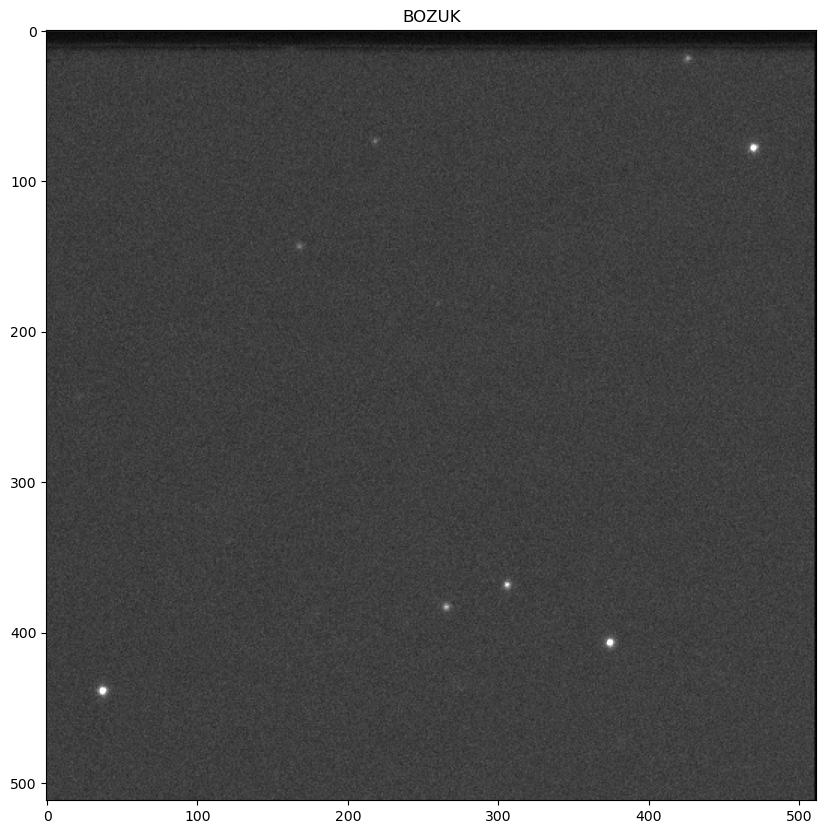

In [86]:
plt.figure(figsize = (10,10))
plt.imshow(tug, vmin = 0.0, vmax = 0.5, cmap = "gray")
plt.title("BOZUK")

Text(0.5, 1.0, 'TAHMİN')

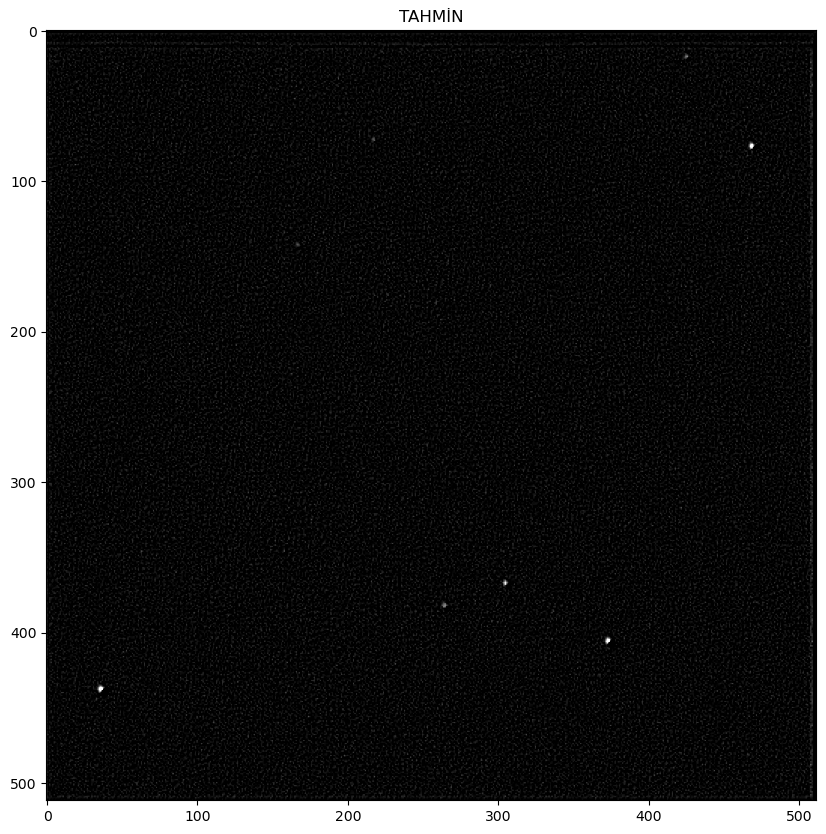

In [85]:
plt.figure(figsize = (10,10))
plt.imshow(res, vmin = 0.0, vmax = 0.5, cmap = "gray")
plt.title("TAHMİN")

In [44]:
np.max(tug)

1.0

In [45]:
np.max(pred)

1.4711624160881251

In [79]:
tug_fwhm = fwhm(tug)
pred_fwhm = fwhm(pred)

tug_avg_fwhm = 0
pred_avg_fwhm = 0

if (tug_fwhm is not None) and (pred_fwhm is not None):

    tug_avg_fwhm = np.mean(tug_fwhm)
    pred_avg_fwhm = np.mean(pred_fwhm) 
    
else:
    tug_avg_fwhm = -1
    pred_avg_fwhm = -1

C:\Users\kullanıcı\AppData\Roaming\Python\Python39\site-packages\photutils\detection\daofinder.py:640: RuntimeWarning: divide by zero encountered in divide
  return ((self.convdata_peak / self.threshold_eff)


In [80]:
print(tug_fwhm)
print(pred_fwhm)

print(tug_avg_fwhm)
print(pred_avg_fwhm)

[5.083590589383411, 5.824517898148959, 5.066606534743976]
None
-1
-1


In [99]:
%run FWHMNEW.ipynb

In [100]:
tug_fwhm = fwhm_new(tug)
pred_fwhm = fwhm_new(pred)
print(tug_fwhm)
print(pred_fwhm)

[37, 438]
[52, 13]


C:\Users\kullanıcı\AppData\Roaming\Python\Python39\site-packages\photutils\detection\daofinder.py:640: RuntimeWarning: divide by zero encountered in divide
  return ((self.convdata_peak / self.threshold_eff)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [84]:
fwhm_new(tug)

5.083590589383411

In [88]:
np.sum(tug)

31858.158565737052

In [90]:
np.sum(pred)

33133.6905451663